In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 242s 1us/step


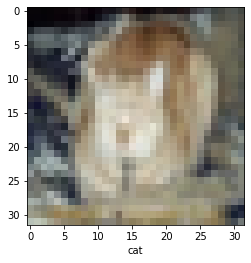

In [10]:
# look for one image
IMG_INDEX = 33  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

#### Convolutional Arquitecture 

In [12]:
model = models.Sequential()
#Define first conv layer with a 3x3 receptive field, activation function and input shape
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
#Based on the input layer define the size of the pooling layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [13]:
model.summary() #we got 30 not 32 cause we do not add a padding 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


#### Define Classifier

In [14]:
model.add(layers.Flatten()) #Flat the pixels meaning put them in a vector
model.add(layers.Dense(64, activation='relu')) #Connects all of those values
model.add(layers.Dense(10)) #We have 10 classes

In [15]:
model.summary() #we finally got 10 output layers

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

#### Train the Model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.5070 - accuracy: 0.4540 - val_loss: 1.2463 - val_accuracy: 0.5522
Epoch 2/4
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.1448 - accuracy: 0.5924 - val_loss: 1.1241 - val_accuracy: 0.6054
Epoch 3/4
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.0024 - accuracy: 0.6482 - val_loss: 1.0284 - val_accuracy: 0.6392
Epoch 4/4
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.9055 - accuracy: 0.6819 - val_loss: 0.9751 - val_accuracy: 0.6615


In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

10000/10000 - 2s - loss: 0.9751 - accuracy: 0.6615
0.6615


### Data Augmentation

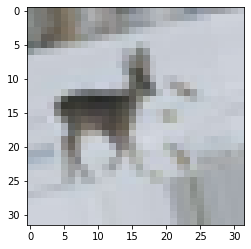

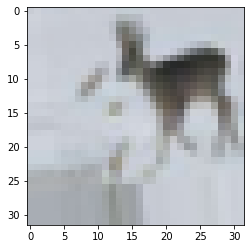

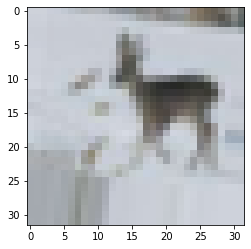

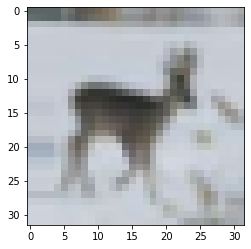

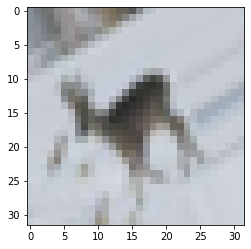

In [22]:
# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

# this loops runs forever until we break, saving images to current directory with specified prefix
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): 
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()